### Score: `[50]`

Q1. `[16]` GOOD JOB。

Q2. `[19]` 位置选择不对，可视化可以再丰富一些。

Q3. `[15]` 5 different plots, 希望不同类型的统计图。

In [5]:
q1_path = '..\\Assignment_rd_common_files\\200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc'
q2_path = '..\\Assignment_rd_common_files\\NOAA_NCDC_ERSST_v3b_SST.nc'

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
<xarray.DataArray 'xch4' (lat: 36, lon: 72)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float64 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
    month    int64 1
Attributes:
    standard_name:  dry_atmosphere_mole_fraction_of_methane
    long_name:      column-average dry-air mole fraction of atmospheric methane
    units:          1
    cell_methods:   time: mean
    fill_value:     1e+20
    comment:        Satellite retrieved column-a

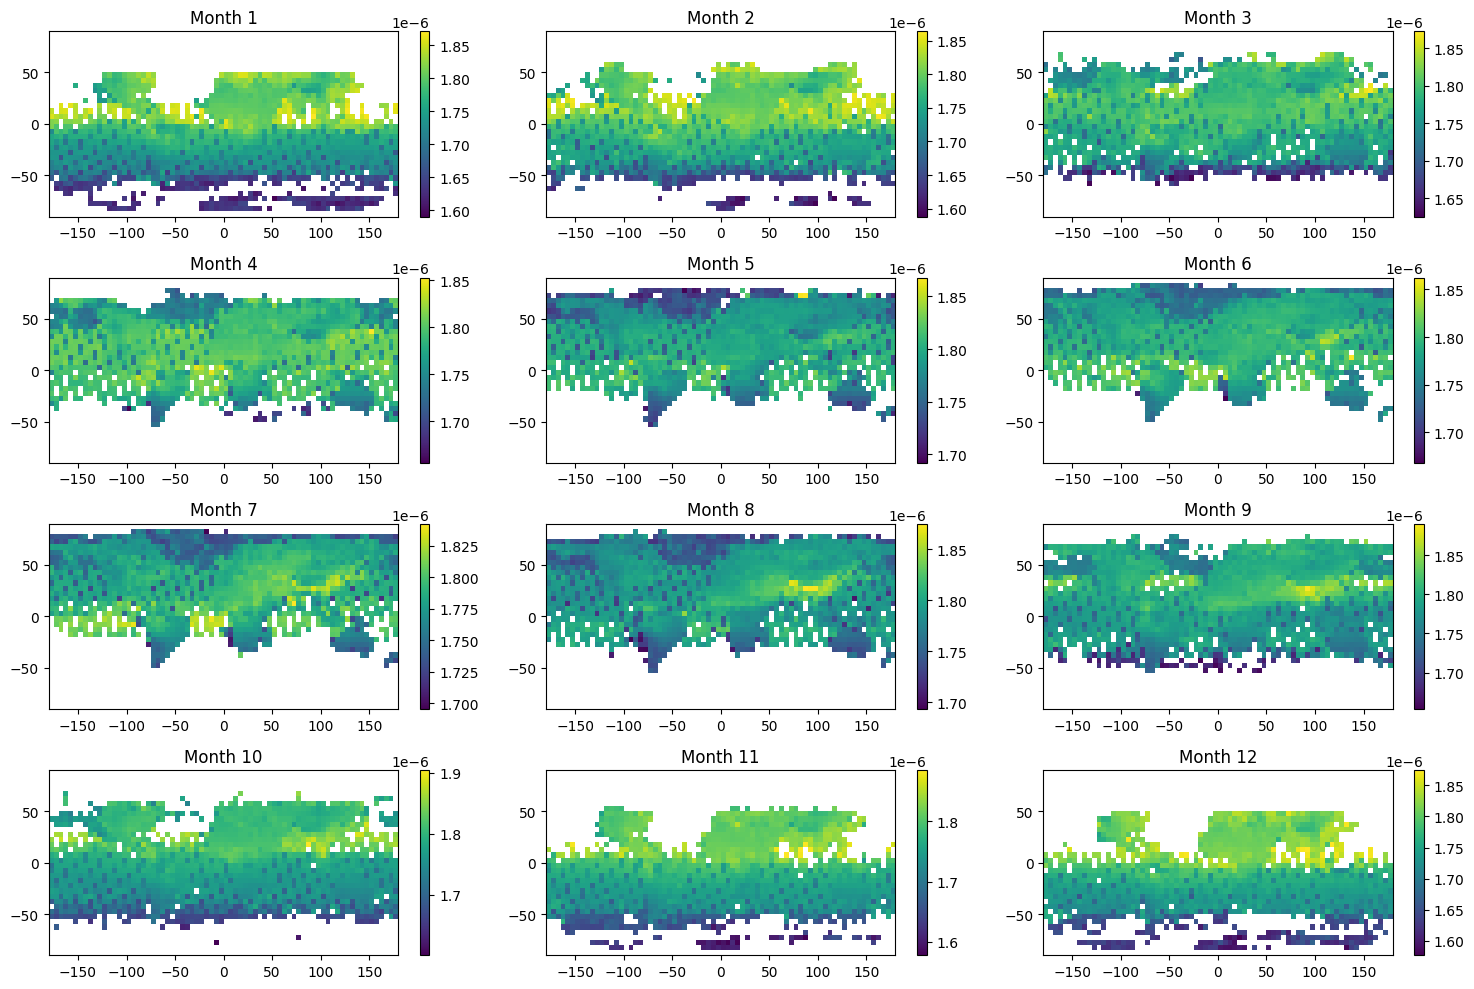

In [2]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
dataset = xr.open_dataset(q1_path,engine='netcdf4')
time = dataset.variables['time']
lat = dataset.variables['lat'][:]
lon = dataset.variables['lon'][:]
xch4 = dataset.variables['xch4'][:]
months = 12
time = pd.to_datetime(time)
time_MONTH = time.month
climatology = np.zeros((months, xch4.shape[1], xch4.shape[2]))
for i in range(months):
    month_mask = (time_MONTH == i + 1) 
    month_data = xch4[month_mask]
    climatology[i] = np.mean(month_data, axis=0)
print(climatology[0])
print(dataset['xch4'].groupby('time.month').mean('time')[0])
fig, axes = plt.subplots(4, 3, figsize=(15, 10))  
for i in range(months):
    ax = axes[i//3, i%3]
    im = ax.pcolormesh(lon, lat, climatology[i])
    ax.set_title(f'Month {i+1}')
    fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

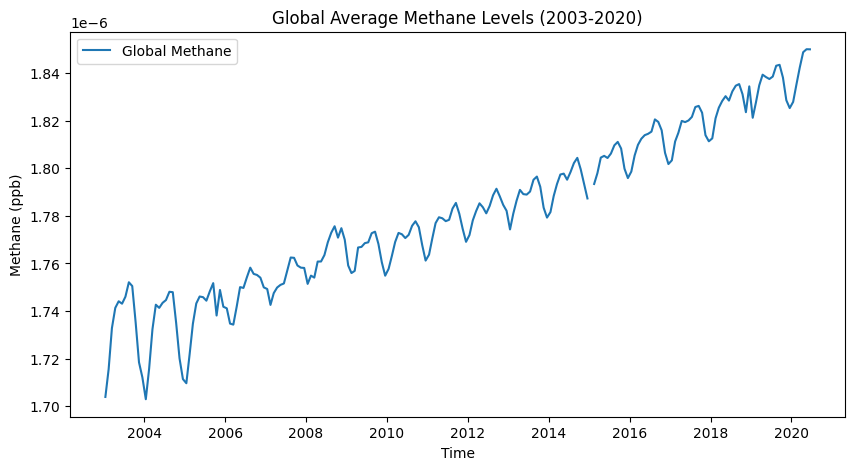

In [3]:
##########1.2
#这里貌似不同版本的xarray会画出不同的图像
#基于xarray2023.6
global_mean = np.mean(xch4, axis=(1, 2)) 
plt.figure(figsize=(10, 5))
plt.plot(time, global_mean, label='Global Methane')
plt.title('Global Average Methane Levels (2003-2020)')
plt.xlabel('Time')
plt.ylabel('Methane (ppb)')
plt.legend()
plt.show()
#大气中的甲烷含量逐年增长，在每年的6、12月份左右，有低值

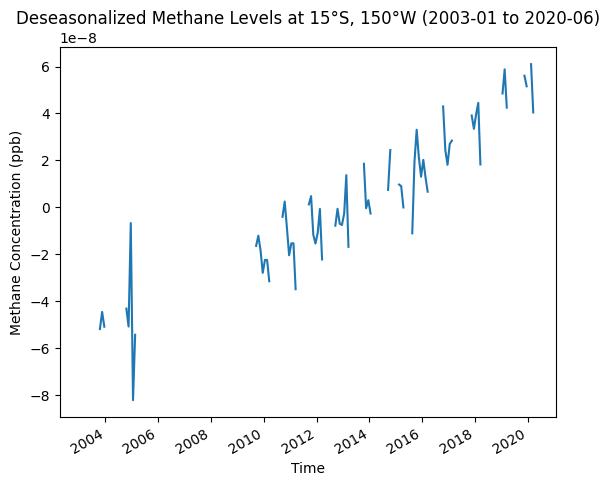

In [ ]:
##########1.3
# NOTE:  Describe your results.
point_data = dataset.xch4.sel(lat=-15, lon=-150, method="nearest")
monthly_mean = point_data.groupby('time.month').mean('time')
deseasonalized_data = point_data.groupby('time.month') - monthly_mean
deseasonalized_data.plot()
plt.title('Deseasonalized Methane Levels at 15°S, 150°W (2003-01 to 2020-06)')
plt.xlabel('Time')
plt.ylabel('Methane Concentration (ppb)')
plt.show()

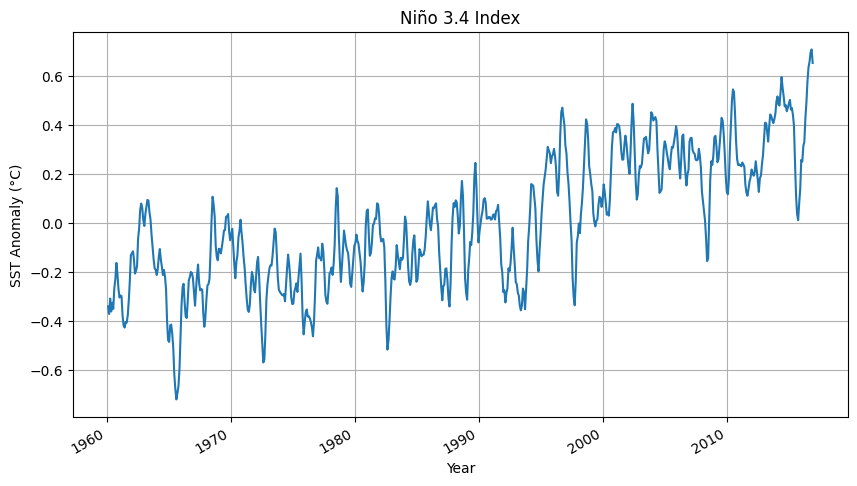

In [ ]:
#############2
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
ds = xr.open_dataset(q2_path)
sst = ds['sst'].sel(lat=slice(-5, 5), lon=slice(120, 170)) # BUG: slice(190, 240)
monthly_climatology = sst.groupby('time.month').mean('time')
anomalies = sst.groupby('time.month') - monthly_climatology
# anomalies
#######2.2
nino34_index = anomalies.rolling(time=3, center=True).mean('time')
plt.figure(figsize=(10, 5))
nino34_index.mean(dim=['lat', 'lon']).plot()
plt.title('Niño 3.4 Index')
plt.xlabel('Year')
plt.ylabel('SST Anomaly (°C)')
plt.grid(True)
plt.show()
# TODO
# 填充曲线到x轴之间区域
# ax.fill_between(...)

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...


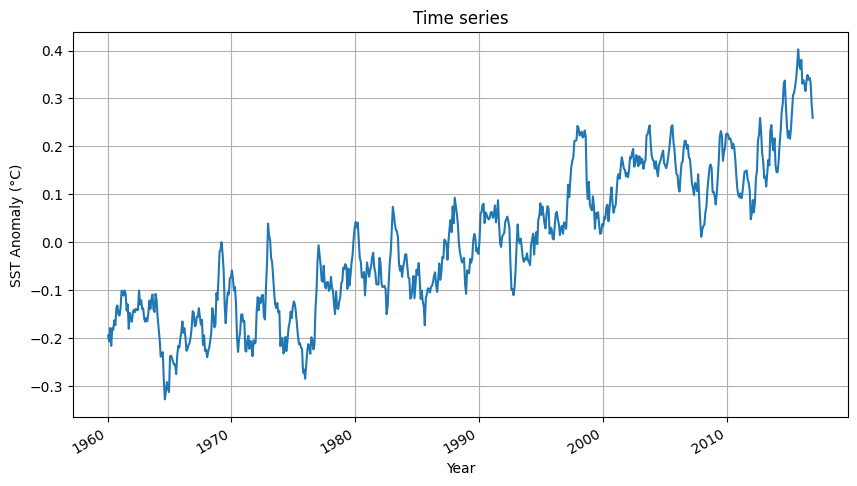

In [9]:
############3
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#3.1
#因为助教发的数据好像每个Nc文件只有一个月的数据，所以我用了第二题的数据做3.1
ds = xr.open_dataset(q2_path)
print(ds)
sst = ds['sst']
monthly_climatology = sst.groupby('time.month').mean('time')
anomalies = sst.groupby('time.month') - monthly_climatology
plt.figure(figsize=(10, 5))
anomalies.mean(dim=['lat', 'lon']).plot()
plt.title('Time series')
plt.xlabel('Year')
plt.ylabel('SST Anomaly (°C)')
plt.grid(True)
plt.show()

<xarray.Dataset>
Dimensions:   (time: 1, lat: 361, lon: 576)
Coordinates:
  * lat       (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon       (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time      (time) datetime64[ns] 2022-02-15
Data variables:
    XCO2      (time, lat, lon) float64 ...
    XCO2PREC  (time, lat, lon) float64 ...
Attributes: (12/25)
    RangeBeginningDate:             2022-02-01
    RangeBeginningTime:             00:00:00.000000
    RangeEndingDate:                2022-02-01
    RangeEndingTime:                23:59:99.999999
    SpatialCoverage:                global
    SouthBoundingCoordinate:        -90.0
    ...                             ...
    ProductionDateTime:             2022-06-29T07:50:51Z
    History:                        Original file generated: Wed Jun 29 07:50...
    ShortName:                      OCO2_GEOS_L3CO2_MONTH_10r
    LongName:                       OCO-2 GEOS Level 3 monthly, 0.5x0.625 ass...

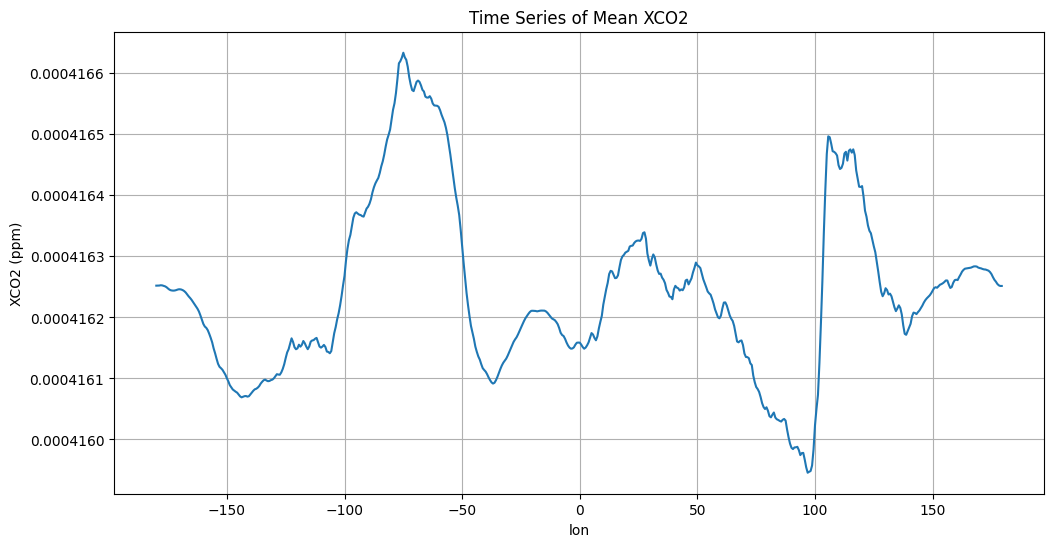

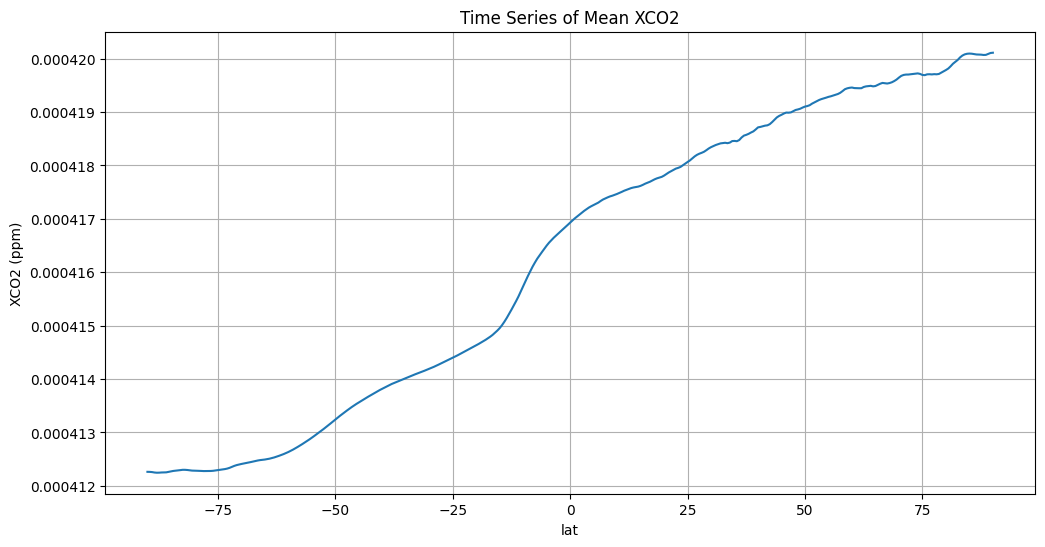

C:\Users\w\AppData\Local\Temp\ipykernel_7732\3477163788.py:30: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
C:\Users\w\AppData\Local\Temp\ipykernel_7732\3477163788.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1200x800 with 0 Axes>

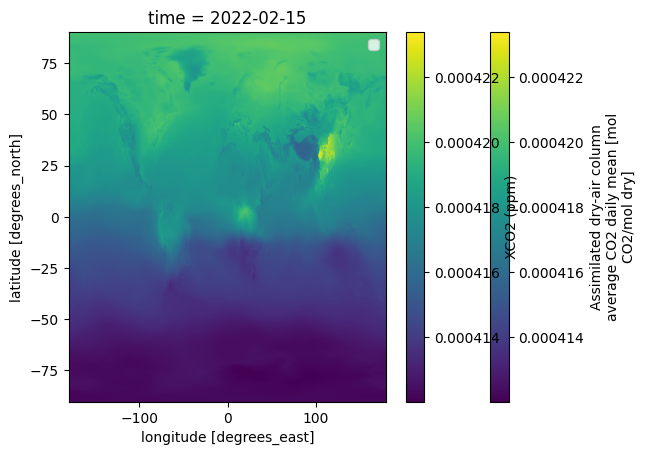

C:\Users\w\AppData\Local\Temp\ipykernel_7732\3477163788.py:41: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
C:\Users\w\AppData\Local\Temp\ipykernel_7732\3477163788.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1200x800 with 0 Axes>

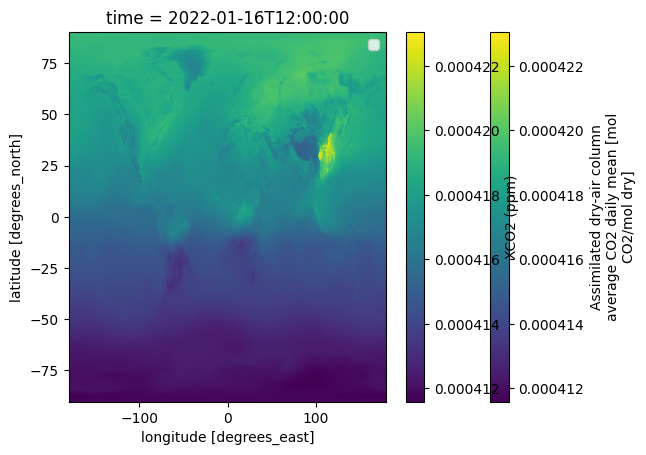

Frozen({'time': 1, 'lat': 361, 'lon': 576})
Frozen({'time': 1, 'lat': 361, 'lon': 576})
('time', 'lat', 'lon')
('time', 'lat', 'lon')


<Figure size 1000x600 with 0 Axes>

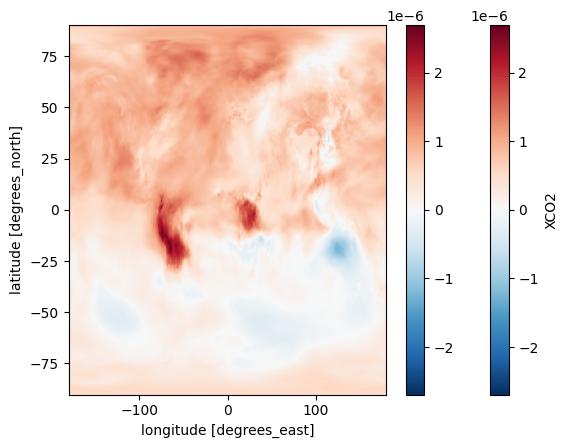

In [11]:
#3.2
#读取了助教发的一个文件，绘制经纬度平均二氧化碳浓度图
ds = xr.open_dataset('..\\Assignment_rd_common_files\\q3_files\\oco2_GEOS_L3CO2_month_202202_B10206Ar.nc4')
print(ds)
#按经度
variable = ds['XCO2']
lon_mean = variable.mean(dim=['lat'])
plt.figure(figsize=(12, 6))
lon_mean.plot()
plt.title('Time Series of Mean XCO2')
plt.xlabel('lon')
plt.ylabel('XCO2 (ppm)')
plt.grid(True)
plt.show()
#按纬度
lat_mean = variable.mean(dim=['lon'])
plt.figure(figsize=(12, 6))
lat_mean.plot()
plt.title('Time Series of Mean XCO2')
plt.xlabel('lat')
plt.ylabel('XCO2 (ppm)')
plt.grid(True)
plt.show()
#绘制全球该时间的二氧化碳浓度，不知道为什么会有两个图例
plt.figure(figsize=(12, 8))
xco2_at_time = variable.isel(time=0)
fig, ax = plt.subplots()
mappable = xco2_at_time.plot(ax=ax, label='XCO2')  
plt.colorbar(mappable, label='XCO2 (ppm)', ax=ax)
plt.legend() 
plt.show()
########再读取一月的数据，奇怪的是上面读取二月分数据时直接输入文件名就行，这里输入文件名会报错
ds2 = xr.open_dataset('..\\Assignment_rd_common_files\\q3_files\\oco2_GEOS_L3CO2_month_202201_B10206Ar.nc4')
#######绘制一月的全球浓度图
variable2 = ds2['XCO2']
plt.figure(figsize=(12, 8))
xco2_at_time2 = variable2.isel(time=0)
fig, ax = plt.subplots()
mappable = xco2_at_time2.plot(ax=ax, label='XCO2')  
plt.colorbar(mappable, label='XCO2 (ppm)', ax=ax)
plt.legend() 
plt.show()
#绘制二月相较于一月全球浓度变化图
#查看两者的形状
print(variable.sizes)
print(variable2.sizes)
print(variable.dims)
print(variable2.dims)
#两者形状明明相同但是ValueError: operands cannot be broadcast together with mismatched lengths for dimension 'lat': (361, 1)
#把时间去掉后进行做差
variable_squeezed = variable.squeeze('time')
variable2_squeezed = variable2.squeeze('time')
var=variable_squeezed-variable2_squeezed
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
mappable = var.plot(ax=ax)
plt.colorbar(mappable, ax=ax)
plt.show()